# Okavango_Scenario

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import matplotlib.patches as patches
from matplotlib.dates import date2num
import matplotlib.dates as mdates
from hydroeval import evaluator, nse, rmse, pbias
from pyemu.pst.pst_utils import SFMT,IFMT,FFMT

flopy is installed in C:\Users\seonggyu.park\Miniconda3\envs\sm_pest\lib\site-packages\flopy


# Set Path

In [71]:
from swatmf_pkgs import swatmf_viz
import itertools

In [145]:
wd = "D:\\Projects\\Watersheds\\Okavango\\scenarios\\okvg_swatmf_scn_climates\\scn_models"
sub_number = 240
start_date = '1/1/2003'
obd_nam = '240'
scn_df = swatmf_viz.all_strs(wd, sub_number, start_date, obd_nam, time_step='M')


Folder changed to D:\Projects\Watersheds\Okavango\scenarios\okvg_swatmf_scn_climates\scn_models\base_ssp245-inm-cm5-0
Folder changed to D:\Projects\Watersheds\Okavango\scenarios\okvg_swatmf_scn_climates\scn_models\base_ssp245-miroc6
Folder changed to D:\Projects\Watersheds\Okavango\scenarios\okvg_swatmf_scn_climates\scn_models\base_ssp245-noresm2-lm
Folder changed to D:\Projects\Watersheds\Okavango\scenarios\okvg_swatmf_scn_climates\scn_models\base_ssp245-ukesm1-0-ll
Folder changed to D:\Projects\Watersheds\Okavango\scenarios\okvg_swatmf_scn_climates\scn_models\base_ssp585-inm-cm5-0
Folder changed to D:\Projects\Watersheds\Okavango\scenarios\okvg_swatmf_scn_climates\scn_models\base_ssp585-miroc6
Folder changed to D:\Projects\Watersheds\Okavango\scenarios\okvg_swatmf_scn_climates\scn_models\base_ssp585-noresm2-lm
Folder changed to D:\Projects\Watersheds\Okavango\scenarios\okvg_swatmf_scn_climates\scn_models\base_ssp585-ukesm1-0-ll
Folder changed to D:\Projects\Watersheds\Okavango\scenar

In [146]:
wd_base = "D:/Projects/Watersheds/Okavango/scenarios/okvg_swatmf_calibrated_base"
# Create data with parameter change
df_rch = pd.read_csv(
                    os.path.join(wd_base, "output.rch"),
                    delim_whitespace=True,
                    skiprows=9,
                    usecols=[1, 3, 6],
                    names=["date", "filter", "streamflow_sim"],
                    index_col=0)

df = df_rch.loc[sub_number]
df.index = pd.date_range('1/1/2003', periods=len(df.streamflow_sim), freq="D")
df.rename(columns = {'streamflow_sim':'base_{}'.format(sub_number)}, inplace = True)
df

,filter,base_240
2003-01-01,1,324.6
2003-01-02,2,322.6
2003-01-03,3,318.9
2003-01-04,4,317.0
2003-01-05,5,315.4
...,...,...
2019-12-27,361,139.7
2019-12-28,362,140.8
2019-12-29,363,141.5
2019-12-30,364,142.2


In [147]:
df = df.drop('filter', axis=1)
base_df = df.resample('M').mean()
base_df

,base_240
2003-01-31,342.874194
2003-02-28,457.085714
2003-03-31,499.345161
2003-04-30,428.226667
2003-05-31,416.509677
...,...
2019-08-31,112.080645
2019-09-30,88.158667
2019-10-31,73.106774
2019-11-30,102.581333


In [148]:
scn_df = scn_df.iloc[:, :8]
scn_df

,base_ssp245-inm-cm5-0_sub_240,base_ssp245-miroc6_sub_240,base_ssp245-noresm2-lm_sub_240,base_ssp245-ukesm1-0-ll_sub_240,base_ssp585-inm-cm5-0_sub_240,base_ssp585-miroc6_sub_240,base_ssp585-noresm2-lm_sub_240,base_ssp585-ukesm1-0-ll_sub_240
2003-01-31,346.9,310.70,329.6,326.10,346.9,310.70,329.6,326.1
2003-02-28,452.8,300.60,454.5,816.80,452.9,300.60,454.5,816.8
2003-03-31,804.0,474.80,483.6,941.70,804.5,474.90,483.8,941.9
2003-04-30,523.9,551.20,465.7,671.80,523.9,551.20,465.7,671.6
2003-05-31,390.1,416.50,463.1,483.80,390.1,416.40,463.2,483.8
...,...,...,...,...,...,...,...,...
2019-08-31,NaN,125.90,158.5,120.60,144.2,128.10,167.8,129.9
2019-09-30,NaN,97.92,128.3,112.10,113.4,100.30,127.7,104.1
2019-10-31,NaN,90.21,123.1,92.11,114.7,86.51,112.7,94.0
2019-11-30,NaN,160.30,122.9,126.40,141.2,124.90,137.4,156.5


In [149]:
s245_min = scn_df.iloc[:, :4].min(axis = 1)
s245_max = scn_df.iloc[:, :4].max(axis = 1)
s585_min = scn_df.iloc[:, 4:].min(axis = 1)
s585_max = scn_df.iloc[:, 4:].max(axis = 1)


In [135]:
str_obd = pd.read_csv(
                    os.path.join(wd_base, 'streamflow.obd'),
                    sep=r'\s+', index_col=0, header=0,
                    parse_dates=True, delimiter="\t",
                    na_values=[-999, ""]
                    )
str_obd

,sub_225_dirico,sub_240_mohembo
date,,
2002-07-31,43.60,179.44
2002-08-31,31.79,152.58
2002-09-30,29.80,129.19
2002-10-31,49.47,106.57
2002-11-30,64.83,100.52
...,...,...
2020-02-29,NaN,366.05
2020-03-31,NaN,603.31
2020-04-30,NaN,719.03


In [150]:
nams = []
nses = []
rmses = []
pbiases = []
rsquareds = []
for i in range(len(scn_df.columns)):
    df =  pd.concat([scn_df.iloc[:, i], str_obd.iloc[:, 1]], axis=1)
    nse, rmse, pbias, rsquared = swatmf_viz.get_stats(df)

    nams.append(scn_df.columns[i])
    nses.append(nse[0])
    rmses.append(rmse[0])
    pbiases.append(pbias[0])
    rsquareds.append(rsquared)

In [151]:
stat_df = pd.DataFrame(
    np.column_stack([nams, nses, rmses, pbiases, rsquareds]),
    columns=['Scenario Name', 'NSE', 'RMSE', 'PBIAS', 'R-Squared'])
stat_df = stat_df.sort_values(by=['NSE'], ascending=False)
stat_df = stat_df.set_index('Scenario Name')
stat_df = stat_df.astype(float).round(3)
stat_df


,NSE,RMSE,PBIAS,R-Squared
Scenario Name,,,,
base_ssp245-miroc6_sub_240,0.548,120.958,9.040,0.572
base_ssp585-miroc6_sub_240,0.505,126.519,7.945,0.534
base_ssp245-inm-cm5-0_sub_240,0.491,129.917,6.819,0.570
base_ssp585-inm-cm5-0_sub_240,0.405,138.751,-4.806,0.534
base_ssp585-ukesm1-0-ll_sub_240,0.026,177.518,-0.217,0.272
base_ssp585-noresm2-lm_sub_240,-0.452,216.761,-18.650,0.335
base_ssp245-noresm2-lm_sub_240,-0.243,200.523,-13.150,0.385
base_ssp245-ukesm1-0-ll_sub_240,-0.089,187.735,6.006,0.253


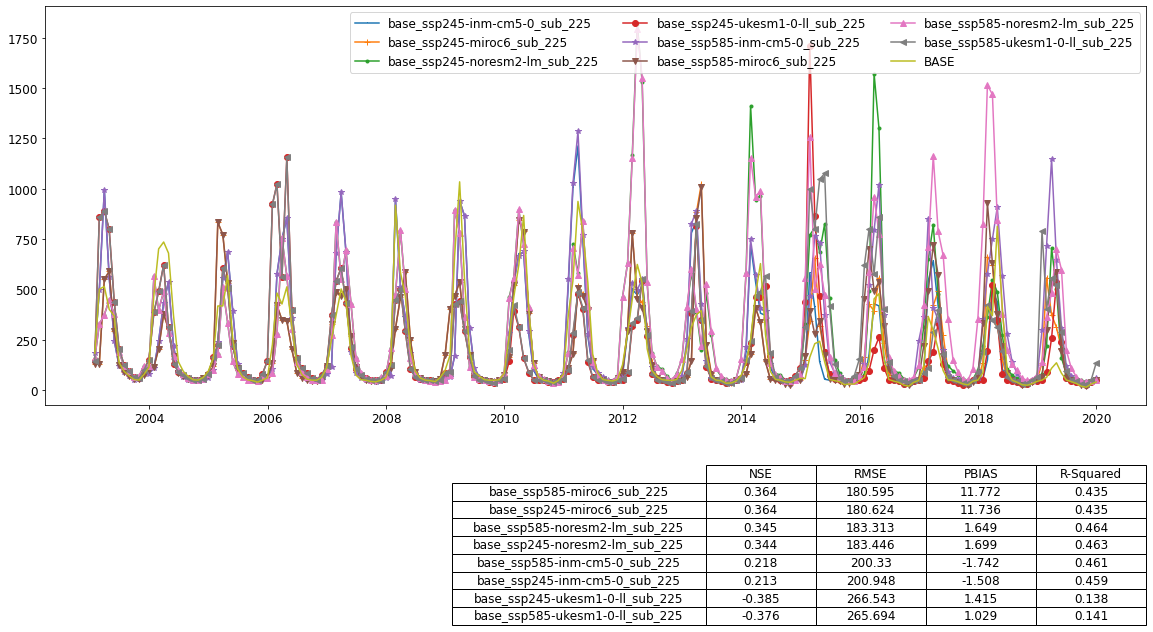

In [139]:
f, ax = plt.subplots(figsize=(16, 6))
marker = itertools.cycle((',', '+', '.', 'o', '*', 'v', '^', '<', '>',))
for i in range(len(scn_df.columns)):
    ax.plot(scn_df.index, scn_df.iloc[:, i], marker = next(marker), label=scn_df.columns[i])

ax.plot(base_df.index, base_df, label='BASE')
ax.tick_params(axis='both', labelsize=12)
lines, labels = f.axes[0].get_legend_handles_labels()
f.tight_layout()
ax.legend(
    lines, labels, ncol=3,
    # bbox_to_anchor=(0, 0.202),
    fontsize=12,
    # loc = 'lower left'
    )

# ax.legend(scn_df.columns.tolist(), fontsize=12, ncol=4)

tb = plt.table(
        cellText=stat_df.values,
        colWidths = [0.1]*len(stat_df.columns),
        rowLabels=stat_df.index,
        colLabels=stat_df.columns,
        cellLoc = 'center', rowLoc = 'center',
        bbox = [0.6, -0.55, 0.4, 0.4])
tb.auto_set_font_size(False)
tb.set_fontsize(12)
tb.scale(1, 2)
plt.savefig(os.path.join(wd, 'okvg_scn_225.png'), dpi=300, bbox_inches="tight")
plt.show()

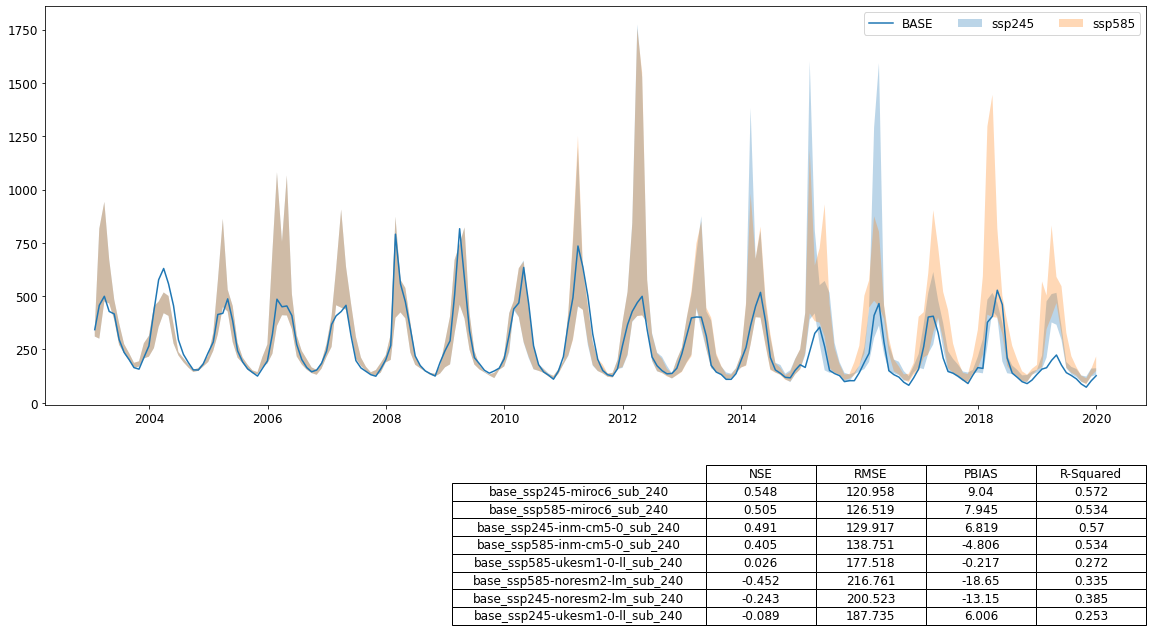

In [152]:
f, ax = plt.subplots(figsize=(16, 6))
marker = itertools.cycle((',', '+', '.', 'o', '*', 'v', '^', '<', '>',))
# for i in range(len(scn_df.columns)):
#     ax.plot(scn_df.index, scn_df.iloc[:, i], marker = next(marker), label=scn_df.columns[i])
ax.fill_between(scn_df.index, s245_min, s245_max, alpha=0.3, label='ssp245')
ax.fill_between(scn_df.index, s585_min, s585_max, alpha=0.3, label='ssp585')
ax.plot(base_df.index, base_df, label='BASE')
ax.tick_params(axis='both', labelsize=12)
lines, labels = f.axes[0].get_legend_handles_labels()
f.tight_layout()
ax.legend(
    lines, labels, ncol=3,
    # bbox_to_anchor=(0, 0.202),
    fontsize=12,
    # loc = 'lower left'
    )

# ax.legend(scn_df.columns.tolist(), fontsize=12, ncol=4)

tb = plt.table(
        cellText=stat_df.values,
        colWidths = [0.1]*len(stat_df.columns),
        rowLabels=stat_df.index,
        colLabels=stat_df.columns,
        cellLoc = 'center', rowLoc = 'center',
        bbox = [0.6, -0.55, 0.4, 0.4])
tb.auto_set_font_size(False)
tb.set_fontsize(12)
tb.scale(1, 2)
plt.savefig(os.path.join(wd, 'fokvg_scn_240.png'), dpi=300, bbox_inches="tight")
plt.show()

In [140]:
df =  pd.concat([base_df.iloc[:, 0], str_obd.iloc[:, 0]], axis=1)
df

,base_225,sub_225_dirico
2002-07-31,NaN,43.60
2002-08-31,NaN,31.79
2002-09-30,NaN,29.80
2002-10-31,NaN,49.47
2002-11-30,NaN,64.83
...,...,...
2020-02-29,NaN,NaN
2020-03-31,NaN,NaN
2020-04-30,NaN,NaN
2020-05-31,NaN,NaN


In [141]:
nse, rmse, pbias, rsquared = swatmf_viz.get_stats(df)
stats = '{} - NSE: {:.2f} | RMSE: {:.2f} | PBIAS: {:.2f} | R-Squared: {:.2f}'.format(df.columns[0], nse[0], rmse[0], pbias[0], rsquared)


In [142]:
stats

'base_225 - NSE: 0.53 | RMSE: 154.79 | PBIAS: -2.16 | R-Squared: 0.60'

In [41]:
se[0][0]

0.4909948670749392